### Importing necessary packages and os

In [111]:
import pandas as pd
from pandas import datetime

In [112]:
import matplotlib.pyplot as plt

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
import os
os.getcwd()

'C:\\Users\\Kiran\\Desktop\\Data science with python'

In [115]:
import seaborn as sns

In [116]:
# importing the file into the pyhton environment
comcast = pd.read_csv('C://Users//Kiran/Desktop/Data science with python/Comcast_telecom_complaints_data.csv',parse_dates = ['Date'])
comcast.head(3)


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [117]:
#Getting a description of the file
comcast.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [118]:
# Getting the dataset info in order to check the data types

comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
Ticket #                       2224 non-null object
Customer Complaint             2224 non-null object
Date                           2224 non-null datetime64[ns]
Date_month_year                2224 non-null object
Time                           2224 non-null object
Received Via                   2224 non-null object
City                           2224 non-null object
State                          2224 non-null object
Zip code                       2224 non-null int64
Status                         2224 non-null object
Filing on Behalf of Someone    2224 non-null object
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 191.2+ KB


In [119]:
comcast.Date_month_year.sort_values().unique()

array(['04-Apr-15', '04-Aug-15', '04-Dec-15', '04-Feb-15', '04-Jan-15',
       '04-Jul-15', '04-Jun-15', '04-Mar-15', '04-May-15', '04-Nov-15',
       '04-Oct-15', '04-Sep-15', '05-Apr-15', '05-Aug-15', '05-Dec-15',
       '05-Feb-15', '05-Jan-15', '05-Jul-15', '05-Jun-15', '05-Mar-15',
       '05-May-15', '05-Nov-15', '05-Oct-15', '05-Sep-15', '06-Apr-15',
       '06-Aug-15', '06-Dec-15', '06-Feb-15', '06-Jan-15', '06-Jul-15',
       '06-Jun-15', '06-Mar-15', '06-May-15', '06-Nov-15', '06-Oct-15',
       '06-Sep-15', '13-Apr-15', '13-Jun-15', '13-May-15', '14-Apr-15',
       '14-Jun-15', '14-May-15', '15-Apr-15', '15-Jun-15', '15-May-15',
       '16-Apr-15', '16-Jun-15', '16-May-15', '17-Apr-15', '17-Jun-15',
       '17-May-15', '18-Apr-15', '18-Jun-15', '18-May-15', '19-Apr-15',
       '19-Jun-15', '19-May-15', '20-Apr-15', '20-Jun-15', '20-May-15',
       '21-Apr-15', '21-Jun-15', '21-May-15', '22-Apr-15', '22-Jun-15',
       '22-May-15', '23-Apr-15', '23-Jun-15', '23-May-15', '24-A

In [120]:
comcast.columns # Show the columns in the data set.

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

- Creating a new datafame for the trendline

In [121]:
# The new data set is named as comcast_tlined. The date is sorted for convenience.
comcast_tlined = comcast.reset_index(drop = True)
comcast_tlined = comcast_tlined.sort_values('Date')
comcast_tlined

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
2144,211677,Comcast refusal of service,2015-04-01,04-Jan-15,12:01:06 PM,Customer Care Call,Wayne,Pennsylvania,19087,Closed,No
71,211976,Fraudulent claims reported to collections agency,2015-04-01,04-Jan-15,1:26:53 PM,Customer Care Call,Atlanta,Georgia,30312,Closed,No
1430,211478,Comcast,2015-04-01,04-Jan-15,10:47:35 AM,Internet,North Huntingdon,Pennsylvania,15642,Closed,No
908,211904,Unable to get in touch with anyone that has th...,2015-04-01,04-Jan-15,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No
2133,212381,"Comcast speeds as low as 12 MB/s, paying for 1...",2015-04-01,04-Jan-15,3:10:12 PM,Customer Care Call,Washington,Pennsylvania,15301,Closed,No
767,213355,Comcast is ignoring me now. They are making NO...,2015-04-01,04-Jan-15,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No
1160,211472,comcast cable,2015-04-01,04-Jan-15,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No
1852,211255,Comcast harassment,2015-04-01,04-Jan-15,12:18:47 AM,Customer Care Call,Schaumburg,Illinois,60193,Closed,No
1237,211775,Horrible Service,2015-04-01,04-Jan-15,12:28:58 PM,Customer Care Call,Mckeesport,Pennsylvania,15132,Closed,No
1537,212701,Comcast Customer Service; Theft; Inconsistency,2015-04-01,04-Jan-15,4:55:18 PM,Customer Care Call,Philadelphia,Pennsylvania,19121,Closed,No


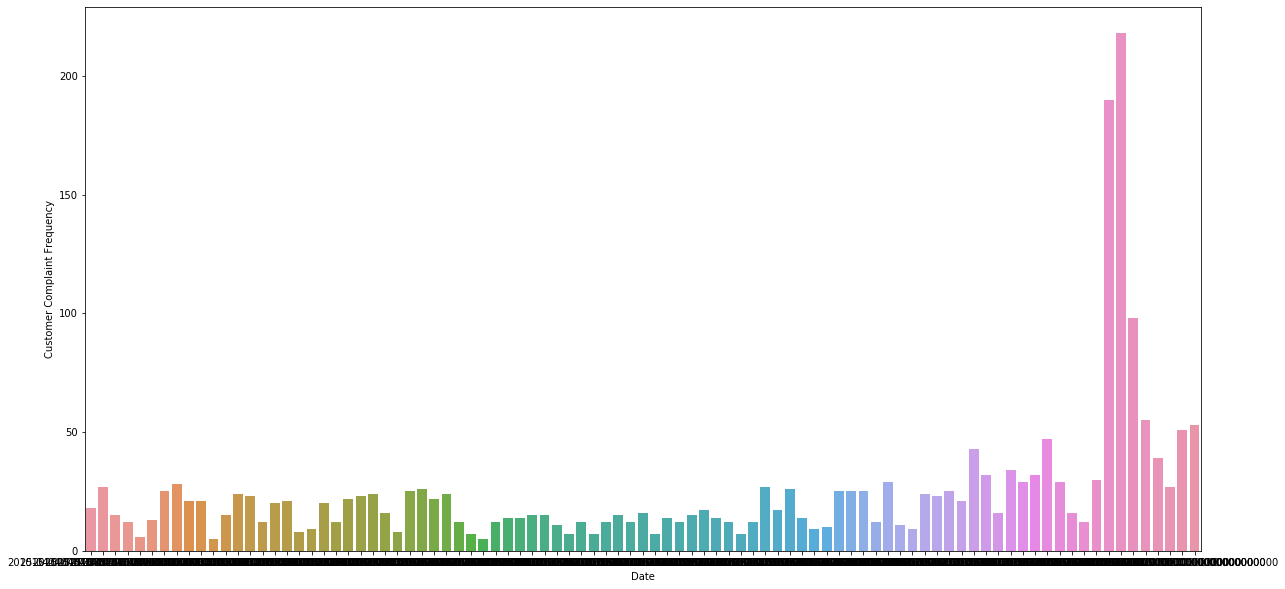

In [122]:
# Date wise representation of the number of complaints received

plt.figure(figsize = (20,10))
sns.countplot(comcast_tlined.Date)
plt.ylabel('Customer Complaint Frequency')
plt.show()


In [123]:
# A new column is inserted stating the month the complaints were made

loc = list(comcast_tlined.columns).index('Date')+1   # Mapping a new variable REVSTA meaning reviewed status.
name = 'Month'
Value = comcast_tlined.Date.dt.month.map({4:'April',5:'May',6:'June'})

comcast_tlined.insert(loc, name, Value) # Insert the row

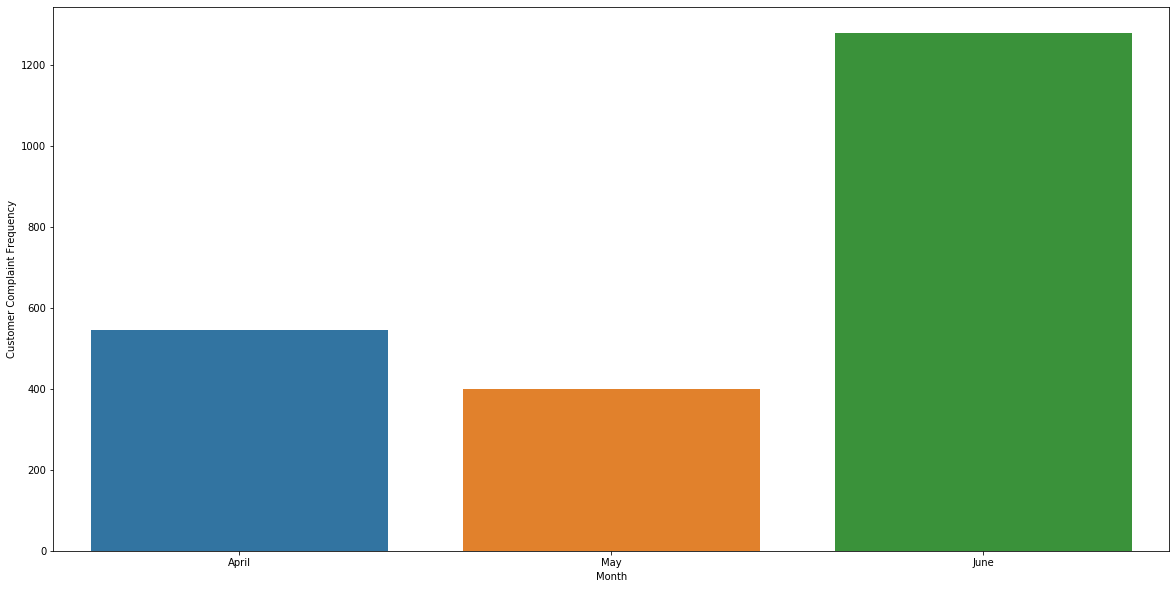

In [124]:
# Month wise representation of the number of complaints received

plt.figure(figsize = (20,10))
sns.countplot(comcast_tlined.Month)
plt.ylabel('Customer Complaint Frequency')
plt.show()


In [125]:
# Obtaining a table for the frequency of complaint types

Complaints_Frequency_table = pd.DataFrame(comcast['Customer Complaint'].value_counts())
Complaints_Frequency_table

,Customer Complaint
Comcast,83
Comcast Internet,18
Comcast Data Cap,17
comcast,13
Data Caps,11
Comcast Data Caps,11
Comcast Billing,11
Unfair Billing Practices,9
Comcast/Xfinity,8
Data Cap,8


In [126]:
# Answer to question: Maximum complaint types
Complaints_Frequency_table.head().index 

Index(['Comcast', 'Comcast Internet', 'Comcast Data Cap', 'comcast',
       'Data Caps'],
      dtype='object')

In [127]:
Complaints_byState = comcast['State'].value_counts() # Arranging data in fequency order of max complaints received by state.
Complaints_byState.head(1).index # The state which receives the maximum complaints.

Index(['Georgia'], dtype='object')

In [128]:
# A variable with Open and Closed values is inserted into the comcast dataframe

loc = list(comcast.columns).index('Status')+1   # Mapping a new variable REVSTA meaning reviewed status.
name = 'REVSTA'
Value = comcast.Status.map({'Pending':'Open','Open':'Open','Solved':'Closed','Closed':'Closed'})

comcast.insert(loc, name, Value) # Insert the row


- A table with the necessary vaiables is created

In [129]:
Status_table = pd.crosstab([comcast['State']],comcast.REVSTA)
Status_table

REVSTA,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


In [130]:
Status_table['Total']=(Status_table.Open+Status_table.Closed)

In [131]:
Status_table['Percentage_Unresolved(%)']=((Status_table.Open)/(Status_table.Total))*100

In [132]:
Status_table

REVSTA,Closed,Open,Total,Percentage_Unresolved(%)
State,,,,
Alabama,17,9,26,34.615385
Arizona,14,6,20,30.000000
Arkansas,6,0,6,0.000000
California,159,61,220,27.727273
Colorado,58,22,80,27.500000
Connecticut,9,3,12,25.000000
Delaware,8,4,12,33.333333
District Of Columbia,14,2,16,12.500000
District of Columbia,1,0,1,0.000000


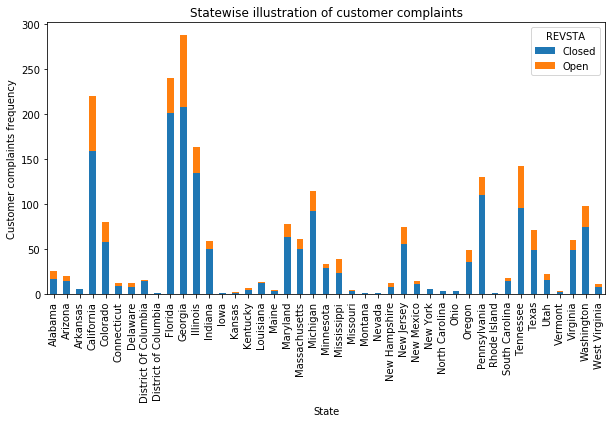

In [133]:
# Statewise illustration of customer complaints in a stacked bar plot
pd.crosstab([comcast['State']],comcast.REVSTA).plot.bar(figsize = (10,5),stacked = True)
plt.ylabel('Customer complaints frequency')
plt.title('Statewise illustration of customer complaints')
plt.show()
# We can say that georgia has received the most complaints looking at the graph
# Kansas has the highest percentage of unresolved cases as we calculate later. It is not too evident on the graph.

In [134]:
Status_table.sort_values('Total', ascending = False).head(1).index # Answering Question: Which state has the maximum complaints.

Index(['Georgia'], dtype='object', name='State')

In [135]:
# Answering ques: Which state has highest percentage of unresolved complaints.

Status_table.sort_values('Percentage_Unresolved(%)',ascending = False).head(1).index 

Index(['Kansas'], dtype='object', name='State')

In [136]:
# Filtering data such that only the complaints received via internet and customer care call are processed

Comp_int_ccc = comcast.loc[(comcast['Received Via'] == 'Internet')|(comcast['Received Via'] =='Customer Care Call')]
Comp_int_ccc

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,REVSTA,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,Closed,No
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,Closed,No
5,338519,ISP Charging for arbitrary data limits with ov...,2015-06-12,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,Closed,No
6,361148,Throttling service and unreasonable data caps,2015-06-24,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,Open,No
7,359792,Comcast refuses to help troubleshoot and corre...,2015-06-23,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,Closed,No
8,318072,Comcast extended outages,2015-06-01,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Open,Yes


In [137]:
# creating the necessary table between REVSTA and received via

Comp_int_ccc_cross = pd.crosstab([Comp_int_ccc['Received Via']],Comp_int_ccc.REVSTA)

In [138]:
# Answering the question: The percentage of resolved complaints till date

Comp_int_ccc_cross['Total']=(Comp_int_ccc_cross.Open+Comp_int_ccc_cross.Closed)
Comp_int_ccc_cross['Percentage']=(Comp_int_ccc_cross.Closed/Comp_int_ccc_cross.Total)*100
Comp_int_ccc_cross.sort_values('Percentage',ascending = False)

REVSTA,Closed,Open,Total,Percentage
Received Via,,,,
Customer Care Call,864,255,1119,77.211796
Internet,843,262,1105,76.289593
